In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [3]:
Categories = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
data_path = "D:/E-just/PROG STUDY\ML/leapGestRecog"
IMG_SIZE = 50

In [4]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in Categories:
        class_index = Categories.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [5]:
import random
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

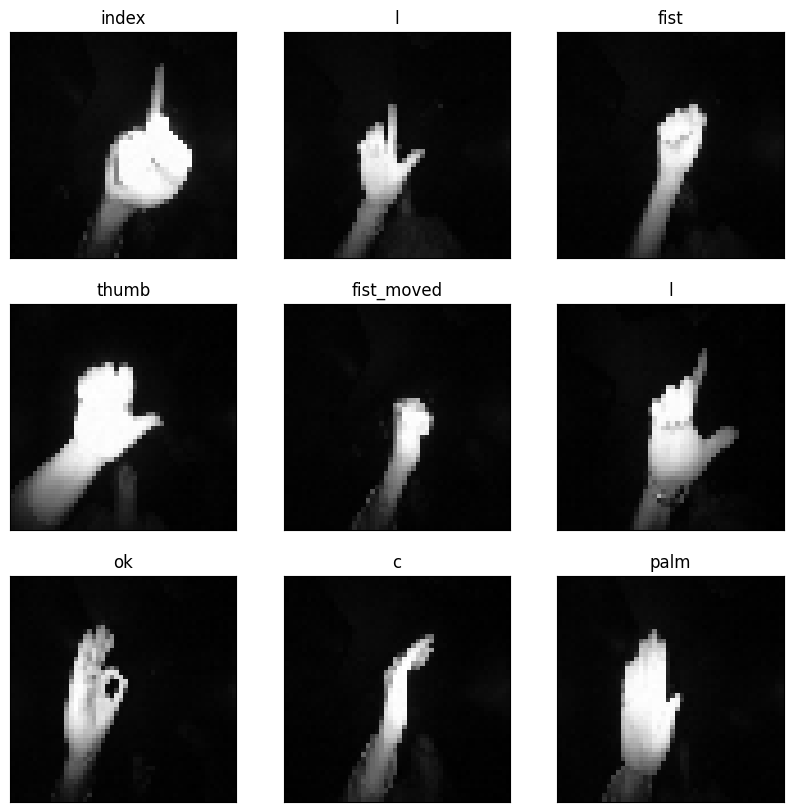

In [7]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(Categories[label[i]][3:])
plt.show()

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [9]:
# one hot encoding (it transforms categorical labels into a format suitable for the neural network's output layer)
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [12]:
# reshaping the data
#(batch_size '-1' inferred automatically), height, width, channels)
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [16]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [17]:
#BUILDING THE MODEL
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 20s 45ms/step - loss: 3.7748e-04 - accuracy: 0.9998 - val_loss: 7.7942e-04 - val_accuracy: 0.9998
Epoch 2/7
438/438 [==============================] - 16s 36ms/step - loss: 7.3038e-04 - accuracy: 0.9997 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 3/7
438/438 [==============================] - 12s 26ms/step - loss: 2.0354e-04 - accuracy: 0.9999 - val_loss: 2.8359e-04 - val_accuracy: 0.9998
Epoch 4/7
438/438 [==============================] - 11s 25ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 5/7
438/438 [==============================] - 11s 25ms/step - loss: 6.3723e-05 - accuracy: 1.0000 - val_loss: 1.7945e-06 - val_accuracy: 1.0000
Epoch 6/7
438/438 [==============================] - 11s 25ms/step - loss: 7.7041e-04 - accuracy: 0.9998 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 7/7
438/438 [==============================] - 11s 25ms/step - loss: 1.0315e-04 - accuracy: 1.0000 - val

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

In [38]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 1s 8ms/step - loss: 7.7156e-04 - accuracy: 0.9998
Test accuracy: 99.98%


188/188 [==============================] - 2s 11ms/step


[]

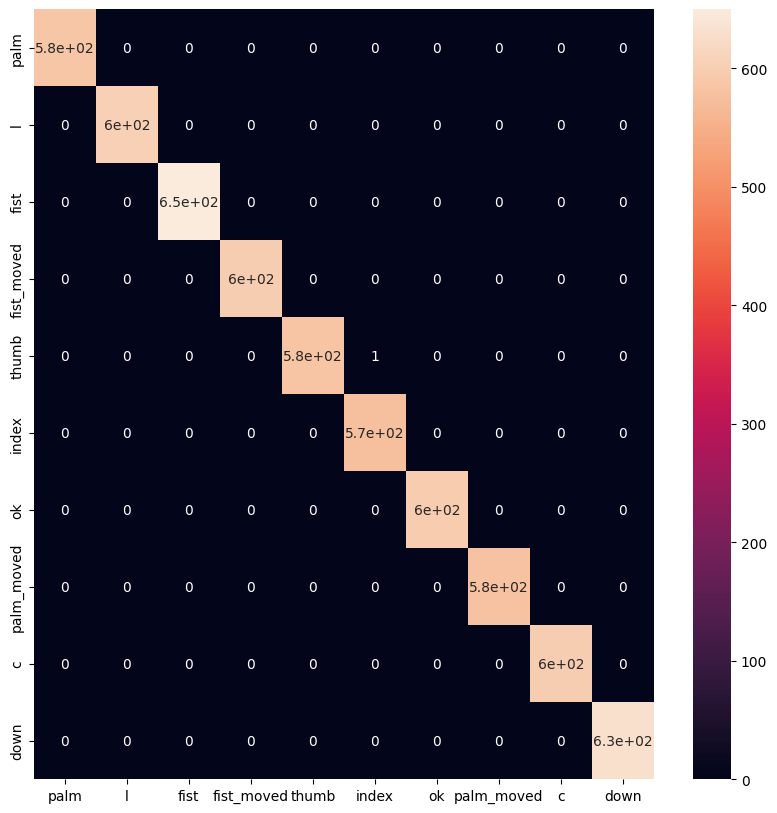

In [39]:
cat = [c[3:] for c in Categories]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()